In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scipy

In [3]:
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [4]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

print(__doc__)

Automatically created module for IPython interactive environment


In [5]:
from sklearn import preprocessing

In [6]:
input_path = '/media/kovan_ai_tor_the_beast/hard_drive_1/DATA/output/'

In [7]:
phi_statistics = 'phi_all_proteins.csv'
psi_statistics = 'psi_all_proteins.csv'

In [9]:
df_phi = pd.read_csv(input_path + phi_statistics, header=None, names=['amino acids', 'phi'])
df_psi = pd.read_csv(input_path + psi_statistics, header=None, names=['amino acids', 'psi'])

In [10]:
print(df_phi.shape)
print(df_psi.shape)

(126253766, 2)
(130620498, 2)


In [58]:
# Choose an amino acid to analys
array = [1.0]
df_phi_angle_statistics = df_phi.loc[df_phi['amino acids'].isin(array)]
#df_phi_angle_statistics.set_index('amino acids', inplace=True)
df_psi_angle_statistics = df_psi.loc[df_psi['amino acids'].isin(array)]
#df_psi_angle_statistics.set_index('amino acids', inplace=True)

In [59]:
print(df_phi_angle_statistics.shape)
print(df_psi_angle_statistics.shape)
df_phi_angle_statistics_2 = df_phi_angle_statistics.dropna(inplace=True)
df_psi_angle_statistics_2 = df_psi_angle_statistics.dropna(inplace=True)
print(df_phi_angle_statistics_2.shape)

(6646924, 2)
(6875452, 2)


/home/kovan_ai_tor_the_beast/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/kovan_ai_tor_the_beast/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


AttributeError: 'NoneType' object has no attribute 'shape'

In [60]:
test_array_phi = df_phi_angle_statistics['phi'].to_numpy()

In [61]:
test_array_psi = df_psi_angle_statistics['psi'].to_numpy()

In [62]:
test_array_phi = test_array_phi.reshape(-1,1)
test_array_psi = test_array_psi.reshape(-1,1)

In [63]:
#X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(25, 1)), axis=0)
qt = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
X = qt.fit_transform(test_array_phi)

In [64]:
qt = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
Y = qt.fit_transform(test_array_psi)

In [65]:
df_phi_transform = pd.DataFrame(data=X, columns=['phi'])

In [66]:
df_psi_transform = pd.DataFrame(data=Y, columns=['psi'])

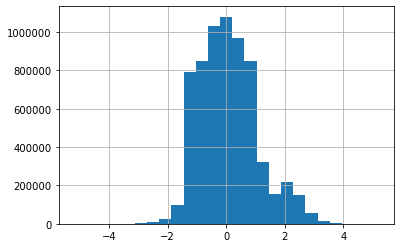

In [67]:
df_phi_transform['phi'].hist(bins=25)

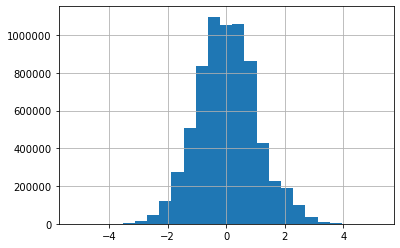

In [68]:
df_psi_transform['psi'].hist(bins=25)

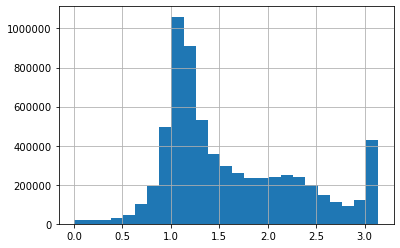

In [69]:
df_phi_angle_statistics['phi'].hist(bins=25)

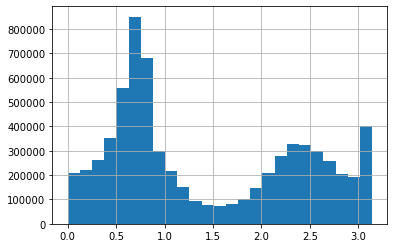

In [70]:
df_psi_angle_statistics['psi'].hist(bins=25)

In [75]:
# Choose an amino acid to analys
array = [2.0]
df_phi_angle_statistics = df_phi.loc[df_phi['amino acids'].isin(array)]
#df_phi_angle_statistics.set_index('amino acids', inplace=True)
df_psi_angle_statistics = df_psi.loc[df_psi['amino acids'].isin(array)]
#df_psi_angle_statistics.set_index('amino acids', inplace=True)

In [76]:
phi = df_phi_angle_statistics['phi'].describe()
psi = df_psi_angle_statistics['psi'].describe()

In [77]:
phi = df_phi_angle_statistics['phi'].describe().to_dict()
phi_transform = df_phi_transform['phi'].describe().to_dict()
psi = df_psi_angle_statistics['psi'].describe().to_dict()
psi_transform = df_psi_transform['psi'].describe().to_dict()

In [78]:
for key, value in phi.items():
    print(key, value)
#for key, value in phi_transform.items():
 #   print(key, value)

count 5310843.0
mean 1.6373152098953467
std 0.6854097704973905
min 0.0
25% 1.1136365966742205
50% 1.4561793612512046
75% 2.079865983520759
max 3.1415926535897927


In [79]:
for key, value in psi.items():
    print(key, value)
#for key, value in psi_transform.items():
 #   print(key, value)

count 5495560.0
mean 1.3633395396556625
std 0.9704583945007795
min 0.0
25% 0.5728649180078662
50% 1.005786545224811
75% 2.2428943819368374
max 3.1415926535897927


In [15]:
df = pd.concat([phi, psi], axis=1)
df = df.drop(df.index[[0, 3, 7]])
print(df.shape)
df = df.transpose()
print(df.shape)
df = pd.concat([df, df], axis=1)
df = df.drop(df.index[1])
df = df.rename(index={'phi':'5950'})
print(df)
print(df.shape)

(5, 2)
(2, 5)
          mean       std       25%       50%      75%      mean       std  \
5950  1.545828  0.707684  1.068581  1.234547  1.96123  1.545828  0.707684   

           25%       50%      75%  
5950  1.068581  1.234547  1.96123  
(1, 10)


In [283]:
for key, value in psi.items():
    print(key, value)
for key, value in psi_transform.items():
    print(key, value)

count 6869580.0
mean 1.4361115887978946
std 0.9600579428661633
min 0.0
25% 0.6482742127618001
50% 1.0066466792496263
75% 2.374343291444304
max 3.1415926535897927
count 6869580.0
mean 0.026466503947023573
std 1.0263759346463524
min -5.199337582605575
25% -0.6634934388112206
50% -0.03761518465591325
75% 0.6836913628980609
max 5.19933758270342


In [ ]:
'ALA','ARG','ASN','ASP','CYS','GLN',
'GLU','GLY','HIS','ILE','LEU','LYS',
'MET','PHE','PRO','SER','THR','TRP',
'TYR','VAL', 'SEC', 'PYL', 'UNK'

In [ ]:
0 "Ala":"5950", 1 "Arg":"6322", 2 "Asn":"6267", 3 "Asp":"5960", 4 "Cys":"5862", 5 "Gln":"5961",
                6 "Glu":"33032", 7 "Gly":"750", 8 "His":"6274", 9 "Ile":"6306", 10 "Leu":"6106", 11 "Lys":"5962",
                12 "Met":"6137", 13 "Phe":"6140", 14 "Pro":"614", 15 "Ser":"5951", 16 "Thr":"6288", 17 "Trp":"6305",
                18 "Tyr":"6057", 19 "Val":"6287"

/home/kovan_ai_tor_the_beast/anaconda3/envs/env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/kovan_ai_tor_the_beast/anaconda3/envs/env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


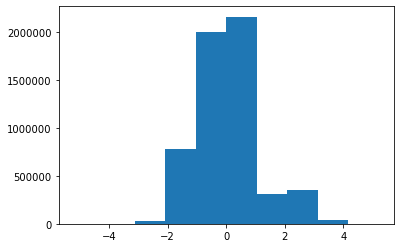

In [171]:
plt.hist(X) 
plt.show()

In [158]:
X = pt.fit_transform(test_array_phi)

(5687830, 1)
<class 'numpy.ndarray'>


In [151]:
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)

In [173]:
k2, p = stats.normaltest(X)
alpha = 0.05 #1e-3
print("p = {:g}".format(p))
p = 3.27207e-11
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [97]:
k2, p = stats.normaltest(test_array_psi)
alpha = 0.05 #1e-3
print("p = {:g}".format(p))
p = 3.27207e-11
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = nan
The null hypothesis can be rejected


In [156]:
# normality test
stat, p = shapiro(X)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


/home/kovan_ai_tor_the_beast/anaconda3/envs/env/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [99]:
# normality test
stat, p = shapiro(test_array_psi)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [174]:
# normality test
result = anderson(X)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

/home/kovan_ai_tor_the_beast/anaconda3/envs/env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/kovan_ai_tor_the_beast/anaconda3/envs/env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/kovan_ai_tor_the_beast/anaconda3/envs/env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1869: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0
/home/kovan_ai_tor_the_beast/anaconda3/envs/env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1957: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


MemoryError: Unable to allocate 235. TiB for an array with shape (5687830, 5687830) and data type float64

In [176]:
# normality test
result = anderson(X)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

/home/kovan_ai_tor_the_beast/anaconda3/envs/env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/kovan_ai_tor_the_beast/anaconda3/envs/env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/kovan_ai_tor_the_beast/anaconda3/envs/env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1869: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0
/home/kovan_ai_tor_the_beast/anaconda3/envs/env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1957: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


MemoryError: Unable to allocate 235. TiB for an array with shape (5687830, 5687830) and data type float64

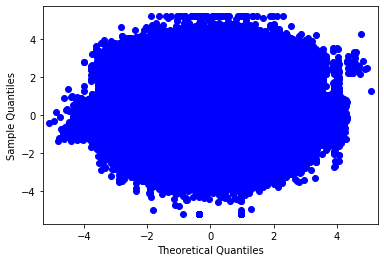

In [175]:
# q-q plot
qqplot(X, line='s')
pyplot.show()

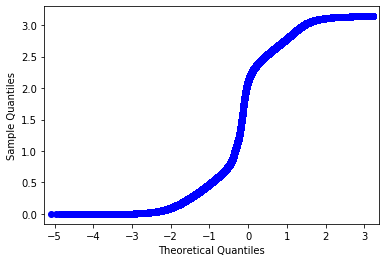

In [108]:
# q-q plot
qqplot(test_array_psi, line='s')
pyplot.show()

In [117]:
data = test_array_phi

N_SAMPLES = len(data)
FONT_SIZE = 6
BINS = 30

rng = data

<class 'numpy.ndarray'>


In [114]:
bc = PowerTransformer(method='box-cox')
yj = PowerTransformer(method='yeo-johnson')
# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal',
                         random_state=rng)
size = (N_SAMPLES, 1)

In [116]:
# lognormal distribution
X_lognormal = rng.lognormal(size=size)

# chi-squared distribution
df = 3
X_chisq = rng.chisquare(df=df, size=size)

# weibull distribution
a = 50
X_weibull = rng.weibull(a=a, size=size)

# gaussian distribution
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)

# uniform distribution
X_uniform = rng.uniform(low=0, high=1, size=size)

# bimodal distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)


# create plots
distributions = [
    ('Lognormal', X_lognormal),
    ('Chi-squared', X_chisq),
    ('Weibull', X_weibull),
    ('Gaussian', X_gaussian),
    ('Uniform', X_uniform),
    ('Bimodal', X_bimodal)
]

colors = ['#D81B60', '#0188FF', '#FFC107',
          '#B7A2FF', '#000000', '#2EC5AC']

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [(0, 3, 6, 9), (1, 4, 7, 10), (2, 5, 8, 11), (12, 15, 18, 21),
             (13, 16, 19, 22), (14, 17, 20, 23)]
axes_list = [(axes[i], axes[j], axes[k], axes[l])
             for (i, j, k, l) in axes_idxs]

for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=.5)

    # perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis='both', which='major', labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
            (ax_bc, ax_yj, ax_qt),
            (X_trans_bc, X_trans_yj, X_trans_qt),
            ('Box-Cox', 'Yeo-Johnson', 'Quantile transform'),
            (lmbda_bc, lmbda_yj, None)):
        ax.hist(X_trans, color=color, bins=BINS)
        title = 'After {}'.format(meth_name)
        if lmbda is not None:
            title += r'\n$\lambda$ = {}'.format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])


plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'lognormal'

In [ ]:
df_ramachandran = pd.concat([df_phi_angle_statistics, df_psi_angle_statistics], axis=1)

In [ ]:
print(df_ramachandran.head(10))
print(df_ramachandran.shape)

In [ ]:
plot = df.plot.scatter(x='phi',
                      y='psi',
                      colormap='viridis')

In [114]:
proline = df_angle_statistics['angles'].describe().to_dict()

In [115]:
print(proline)

{'count': 5683945.0, 'mean': 1.3462763691482962, 'std': 0.6097963398174597, 'min': 0.0, '25%': 1.0263227572214753, '50%': 1.1858932834596678, '75%': 1.3702313376316848, 'max': 3.1415926535897927}


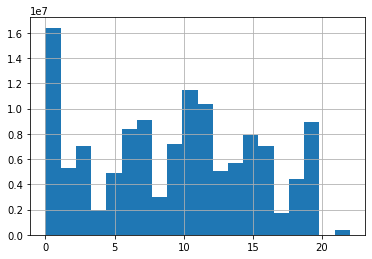

In [116]:
df['amino acids'].hist(bins=20)

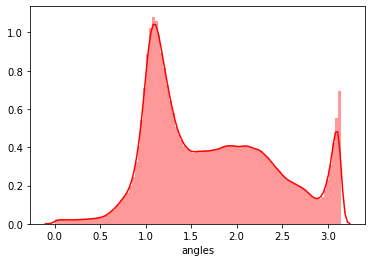

In [86]:
sns.distplot(df_0['angles'], kde=True, color='red', bins=100)

In [41]:
plt.hist(df_0['angles'], bins=25, density=1, facecolor='g', alpha=0.75)
plt.grid(True)
plt.xlabel('x', fontsize=16, color='green')
plt.ylabel('y', fontsize=16, color='green')
plt.show()

/home/simon/anaconda3/envs/dihedral/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
/home/simon/anaconda3/envs/dihedral/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal


ImportError: cannot import name '_png' from 'matplotlib' (/home/simon/anaconda3/envs/dihedral/lib/python3.7/site-packages/matplotlib/__init__.py)

<Figure size 432x288 with 1 Axes>

In [237]:
angle = 'psi'
amino = amino
mean = np.nanmean(results, axis=0)
std = np.nanstd(results)
median = np.nanmedian(results)
max = np.nanmax(results)
min = np.nanmin(results)
n = []
for i in results:
    if np.isnan(i) == True:
        pass
    else:
        n.append(i)
print("The total length of the protein is {}".format(len(df)))
print("The total number of entries for {} {} is {}".format(angle, amino, len(results)))
print("The total number of samples for {} {} is {}".format(angle, amino, len(n)))
print("The total number of nan for {} {} is {}".format(angle, amino, len(results)-len(n)))
print("The mean {} for {} is {}".format(angle, amino, mean))
print("The median {} for {} is {}".format(angle, amino, median))
print("The std {} for {} is {}".format(angle, amino, std))
print("The max {} for {} is {}".format(angle, amino, max))
print("The min {} for {} is {}".format(angle, amino, min))

The total length of the protein is 1304
The total number of entries for psi 0 is 141
The total number of samples for psi 0 is 141
The total number of nan for psi 0 is 0
The mean psi for 0 is 1.1434045235093935
The median psi for 0 is 0.7310228523475486
The std psi for 0 is 0.889868851565185
The max psi for 0 is 2.683464839452859
The min psi for 0 is 1.3969534632349997e-05


In [239]:
results_array = np.array(results)

In [243]:
for i in results_array:
    print(results_array.dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [244]:
for i in range(0,4):
    print(i)

0
1
2
3


In [283]:
def u(n):
    u = n**2 - 3*n
    while u < 10**4:
#         print("U is equal to {}".format(u))
        n += 1
        u = n**2 - 3*n
    else:
        print("The value of p is {}".format(n))
        print("The value of U for p equal to {} is {}".format(n, u))

In [284]:
u(102.00000002)

The value of p is 102.00000002
The value of U for p equal to 102.00000002 is 10098.000004020001


In [310]:
input_path='/media/simon/disk/protein_folding/test_output/'

In [311]:
with open(input_path + '_psi_concatenation.pickle', 'rb') as labels_file:
    df = pd.read_pickle(labels_file)

In [312]:
print(len(df))
print(df.shape)

2608
(2608,)


In [313]:
print(df)

[ 9.          3.12487779 16.         ...  0.30313664 11.
  0.66216912]


In [269]:
input_path='/media/simon/disk/protein_folding/psi_angles'
amino='5f4s_amino_psi_.pickle'
with open(input_path + '/' + amino, 'rb') as labels_file:
    df1 = pd.read_pickle(labels_file)
print(len(df1))

1304


In [270]:
input_path='/media/simon/disk/protein_folding/psi_angles'
amino='5f4r_amino_psi_.pickle'
with open(input_path + '/' + amino, 'rb') as labels_file:
    df2 = pd.read_pickle(labels_file)
print(len(df2))

666


In [271]:
input_path='/media/simon/disk/protein_folding/psi_angles'
amino='5f4q_amino_psi_.pickle'
with open(input_path + '/' + amino, 'rb') as labels_file:
    df3 = pd.read_pickle(labels_file)
print(len(df3))

790


In [273]:
print(len(df1)+ len(df2) + len(df3))

2760


In [296]:
2760-2608

152